# RSA Şifrelemeye Kısa Bir Bakış

RSA, güvenliği tam sayıları çarpanlarına ayrımanın algoritmik zorluğuna dayanan bir tür Açık anahtarlı şifreleme yöntemidir.
1978’de Ron Rivest, Adi Shamir ve Leonard Adleman tarafından bulunmuştur. Bir RSA kullanıcısı iki büyük asal sayının çarpımını
üretir ve seçtiği diğer bir değerle birlikte ortak anahtar olarak ilan eder. Seçilen asal çarpanları ise saklar.
Ortak anahtarı kullanan biri herhangi bir mesajı şifreleyebilir, ancak şu anki yöntemlerle eğer ortak anahtar yeterince büyükse 
sadece asal çarpanları bilen kişi bu mesajı çözebilir. RSA şifrelemeyi kırmanın çarpanlara ayırma problemini kırmak kadar zor 
olup olmadığı hala kesinleşmemiş bir problemdir.

RSA algoritması anahtar üretimi, şifreleme ve şifre çözme olmak üzere 3 basamaktan oluşmaktadır.

## 1.Anahtar Üretimi 

RSA için bir ortak anahtar bir de özel anahtar gerekir. Ortak anahtar herkes tarafından bilinir ve mesajı şifrelemek için kullanılır. Bir ortak anahtarla şifrelenmiş mesaj sadece özel anahtarla çözülebilir. RSA anahtarları şu şekilde oluşturulur:

1. İki adet birbirinden değişik asal sayı seçin, bunların adını da **_p_** ve **_q_** koyalım.


2. **_n_ = _q_ * _p_** hesaplayın. 

3. Bu sayıların totienti olan **_φ(n)_ = _(q-1)_ * _(p-1)_**

4. Bir tam sayı üretin ve adını da **_e_** koyun. Bu sayı, **_1_ < _e_ < _φ(n)_** koşuluna uygun olmalı ve **_φ(n)_** ile en büyük ortak böleni 1 olmalıdır (başka bir deyişle **_φ(n)_** ve **_e_** kendi aralarında asal olmalıdır). 
 **_e_** ortak anahtar(public key) olarak açıklanır.

5. **_d_ * _e_ = 1 (mod _φ(n)_ )** olacak şekilde bir **_d_** belirleyin. **_d_** özel anahtar olarak saklanır.

Ortak anahtar, mod değeri olan **_n_** 'den ve ortak üs olan **_e_** 'den oluşur. Özel anahtar ise mod değeri olan **_n_** 'den ve özel üs olan ayrıca gizli kalması gereken **_d_** 'den oluşur. (**_p_**,**_q_** ve **_φ(n)_** değerleri de gizli kalmalıdır çünkü **_d_** 'yi hesaplamada kullanılırlar.)

## 2.Şifreleme

Alice ortak anahtarı **(n,e)** ’yi Bob’a gönderir, özel anahtarını gizli tutar. Bob **_m_** mesajını Alice’e göndermek istediği zaman şifrelenmiş mesaj **_c_**  ’yi **_c_ = $m^e$(mod _n_ )**  olacak şekilde hesaplar. Bob  **_c_** ’yi Alice’e iletir.

## 3.Şifre Çözme

Alice **_m_** mesajını, özel anahtarı olan **_d_** ’yi kullanarak şifreli mesaj **_c_** ’den şu şekilde hesaplar:
**_m_ = $c^d$(mod _n_ )**





### Örnek

1. İki farklı asal sayı seçelim. **_p_ = 61** ve **_q_ = 53** olsun.

2. **_n_ = p * q** değerini hesaplayalım. **61 × 53 = 3233**.

3. Totient değerini hesaplayalım.**_φ(n)_ = _(61-1)_ × _(53-1)_ = 3120** 

4. 1 ile 3120 arasında 3120 ile aralarında asal olan bir **_e_** değeri seçelim. **_e_** değerini asal seçersek sadece 3120’nin böleni olup olmadığını kontrol etmemiz gerekir. **_e_ = 17** olsun.

5. **_d_** ’yi **_e_** ’nin **mod _φ(n)_** ’deki çarpmaya gore tersi olarak hesaplayalım. **_d_ = 2753**

**Ortak Anahtar** : **(_n_ = 3233,e = 17).** Herhangi bir **_m_** mesajı için şifreleme fonksiyonu **_$m^1$$^7$_ mod(3233)**.

**Özel Anahtar** : **(_n_ = 3233,d = 2753).** Herhangi bir **_c_** şifreli mesajı için şifre çözme fonksiyonu **_$c^2$$^7$$^5$$^3$ mod(3233)_**.

Örneğin **_m_ = 65** ’i şu şekilde şifreleriz: **_c_ = $65^1$$^7$ mod(3233) = 2790**.

**_c_ = 2790**’ın şu şekilde şifresini çözebiliriz: **_m_ = $2790^2$$^7$$^5$$^3$ mod(3233) = 65**

## Örnek Python Kodu

In [1]:
import random


def asaluret(a, b):
    asallar = []
    for i in range(a, b):
        asal_mı = True
        for j in range(2, int(i ** 0.5) + 1):
            if i % j == 0:
                asal_mı = False
        if asal_mı:
            asallar.append(i)
        if len(asallar) > 10:
            break
    return asallar


def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)


def sifreuret(aralik1, aralik2):
    asallar = asaluret(aralik1, aralik2)
    r1 = random.randrange(len(asallar))
    r2 = r1
    while r2 == r1:
        r2 = random.randrange(len(asallar))

    p = asallar[random.randrange(len(asallar))]
    q = asallar[random.randrange(len(asallar))]
    print(p)
    print(q)
    n = p * q
    t = (p - 1) * (q - 1)

    for e in range(2, t):
        if gcd(e, t) == 1:
            break

    for i in range(1, 10):
        x = 1 + i * t
        if x % e == 0:
            d = int(x / e)
            break
    return [n, e, t, d]


def csifrecoz(n):
    asal1 = 1
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            asal1 = i
            break
    asal2 = int(n / asal1)

    return [asal1, asal2]

b = int(input("Cozmek istediginiz N degerini girin: "))
print("[p,q] =",csifrecoz(b))


Cozmek istediginiz N degerini girin: 35
[p,q] = [5, 7]


# SHOR Algoritması

## Tanım

Shor algoritması 1994'te Amerikalı matematikçi Peter W. Shor tarafından geliştirilmiş bir algoritmadır. Bu algoritma kuantum bilgisayarlarında çok büyük sayıları kolaylıkla asal çarpanlarına ayırabilmektedir. Shor algoritması bu özelliğiyle kriptoloji tarihinin dönüm noktalarından biri olarak kabul edilmektedir.


Shor Algoritması için 2 register' lı bir devre kuruyoruz. Birinci register' ımız input register' ı. Bu registerdaki qubitler modüler üs alma fonksiyonunun girdileri. Bir diğer register' ımız ise bu fonksiyonun çıktılarını tutan output register' ımız.
Modüler üs alma fonksiyonu:

$$ f(x) = c^x mod(N) $$


1. 0 dan $2^n$$^-$$^1$' e kadar olan bütün x sayılarının superposition değeri hesaplanır ve N' deki modüler üstel değerleri hesaplanır.

$$    \tfrac{1}{\sqrt(2^n)} \left( \sum_{x=0}^{2^n-1} |x\rangle|c^x mod(N)\rangle\right)      $$

2. Sonra output register' ını ölçeriz. Bu bize f(x_0) değerini verir.

$$  |φ\rangle =  \tfrac{1}{\sqrt(m)} \left( \sum_{k=0}^{m-1} |x_0 + kr\rangle\right)      $$

3. Sıradaki işlemimiz input register' ına Fourier Transform uygulamaktır. Aşağıdaki şekildeki gibi tanımlanmıştır.Sonuç olarak input register durumların süperpozisyonu haline gelir.

$$  U_{FT}|x\rangle =   \tfrac{1}{\sqrt(2^n)}e^{2ixy/2n}  |y\rangle      $$

4. Ardından input registerı ölçülerek |y> aralığı bulunur


5. Şekilde verilen kesirli ifade kullanılarak periot hesaplanır.
   $$ \tfrac{y}{(2^n)} $$
   Bazı j değerleri için j/r oranı devam eden kesirli ifadelerin kısmi toplamlarından biri olarak bulunacaktır.



6. Bulunan periodun denklemi sağladığı doğrulanır.

$$ c^r  mod15  =1 $$


7. Aşağıda verilen formül ile (d') 'nün ters modu hesaplanır.

$$ ed = sr + 1$$

8. Ve nihayet bulduğumuz d' kullanılarak şifrli mesaj (c) kullanılarak esas mesaj (m) elde edilir.

$$m = c^d $$


## Örnek Shor Algoritması Kodu

**4 bit'lik şifreler için Shor Algoritmasının uygulanması.**

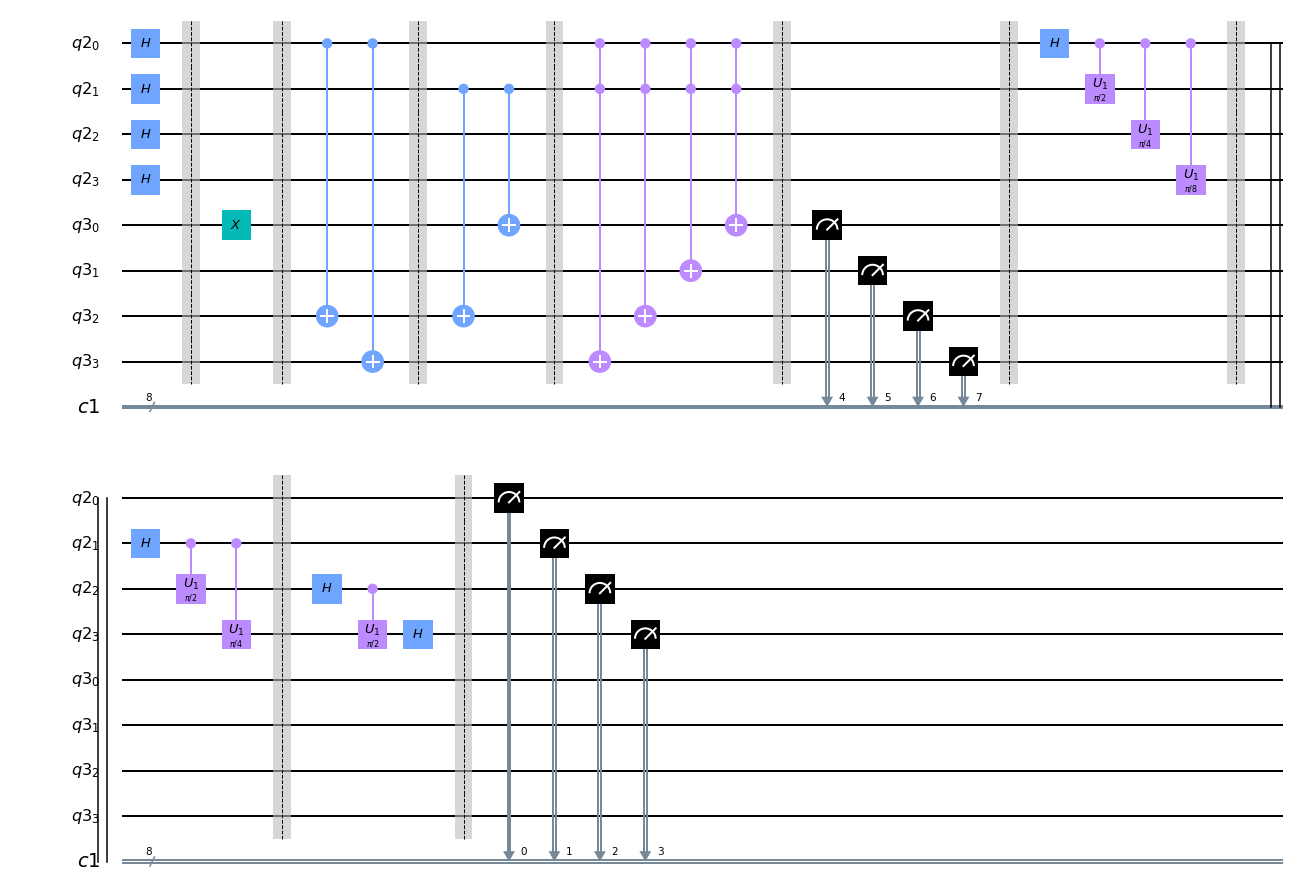

In [10]:
from qiskit import Aer
 
import math
 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import BasicAer
 
backend = BasicAer.get_backend('qasm_simulator')
 
input_register  = QuantumRegister(4)
output_register = QuantumRegister(4)
c = ClassicalRegister(8)
 
qc = QuantumCircuit(input_register, output_register,c)
qc.h(input_register)
qc.barrier()
 
qc.x(output_register[0])
qc.barrier()
 
qc.cx(input_register[0],output_register[2])
qc.cx(input_register[0],output_register[3])
qc.barrier()
 
qc.cx(input_register[1],output_register[2])
qc.cx(input_register[1],output_register[0])
qc.barrier()
 
qc.ccx(input_register[0],input_register[1],output_register[3])
qc.ccx(input_register[0],input_register[1],output_register[2])
qc.ccx(input_register[0],input_register[1],output_register[1])
qc.ccx(input_register[0],input_register[1],output_register[0])
qc.barrier()
 
# measure the output
qc.measure([4,5,6,7],[4,5,6,7])
qc.barrier()
 
 
#Apply the Fourier Transform to the new state of the input register.
qc.h(input_register[0])
qc.cu1(math.pi/float(2),input_register[0],input_register[1])
qc.cu1(math.pi/float(2**2),input_register[0],input_register[2])
qc.cu1(math.pi/float(2**3),input_register[0],input_register[3])
qc.barrier()
 
qc.h(input_register[1])
qc.cu1(math.pi/float(2),input_register[1],input_register[2])
qc.cu1(math.pi/float(2**2),input_register[1],input_register[3])
qc.barrier()
 
qc.h(input_register[2])
qc.cu1(math.pi/float(2),input_register[2],input_register[3])
qc.h(input_register[3])
qc.barrier()
 
qc.measure([0,1,2,3],[0,1,2,3])
 
qc.draw(output='mpl')

{'01000010': 34, '01111011': 2, '11010000': 51, '01111111': 54, '01000011': 4, '01111101': 3, '01111001': 2, '01000001': 60, '01000101': 2, '01111110': 23, '00011011': 5, '00010010': 31, '00011010': 3, '11010110': 4, '00011101': 4, '01001101': 7, '01001111': 55, '11010010': 33, '00010111': 1, '11011001': 2, '00010110': 6, '11010011': 4, '00011111': 50, '11011010': 4, '00011110': 34, '01001110': 17, '01110010': 30, '00010011': 9, '00011001': 5, '11011110': 25, '00010101': 6, '00010001': 44, '01000000': 57, '01110101': 3, '01110011': 6, '01001001': 3, '00010000': 65, '01001010': 4, '11011101': 5, '01111010': 5, '01000110': 8, '01110000': 54, '01000111': 4, '11011011': 2, '11011111': 57, '01110001': 50, '01001011': 3, '11010101': 2, '01110110': 5, '11010001': 53}


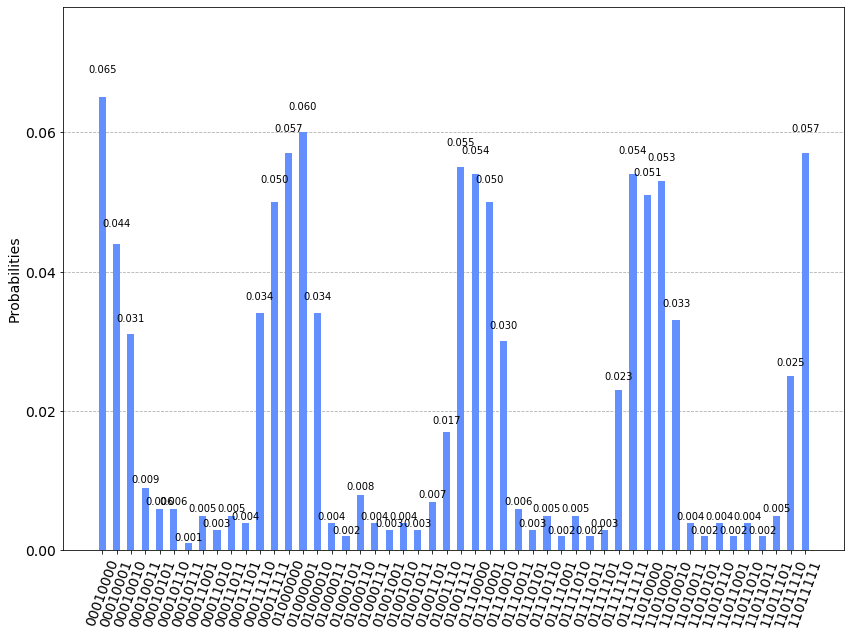

In [11]:
job = execute(qc, backend,shots=1000)
result=job.result()
counts= result.get_counts(qc)
print(counts)
plot_histogram(data=counts, figsize=(14,10))

In [13]:
x=counts

sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)

y = []

for k in sorted_x:
    h=k[0][4:]
    hrev = h[::-1]
    sum = 0
    for i in range(0,4):
        sum += pow(2,3-i)*int(hrev[i])
 
    if sum != 0:
        y.append(sum)
        print("%s %s %s %2d" % ( k, h, hrev, sum))
    
y = y[:8]
print()
print(y)        

('01000001', 60) 0001 1000  8
('11011111', 57) 1111 1111 15
('01001111', 55) 1111 1111 15
('01111111', 54) 1111 1111 15
('11010001', 53) 0001 1000  8
('00011111', 50) 1111 1111 15
('01110001', 50) 0001 1000  8
('00010001', 44) 0001 1000  8
('01000010', 34) 0010 0100  4
('00011110', 34) 1110 0111  7
('11010010', 33) 0010 0100  4
('00010010', 31) 0010 0100  4
('01110010', 30) 0010 0100  4
('11011110', 25) 1110 0111  7
('01111110', 23) 1110 0111  7
('01001110', 17) 1110 0111  7
('00010011', 9) 0011 1100 12
('01000110', 8) 0110 0110  6
('01001101', 7) 1101 1011 11
('00010110', 6) 0110 0110  6
('00010101', 6) 0101 1010 10
('01110011', 6) 0011 1100 12
('00011011', 5) 1011 1101 13
('00011001', 5) 1001 1001  9
('11011101', 5) 1101 1011 11
('01111010', 5) 1010 0101  5
('01110110', 5) 0110 0110  6
('01000011', 4) 0011 1100 12
('11010110', 4) 0110 0110  6
('00011101', 4) 1101 1011 11
('11010011', 4) 0011 1100 12
('11011010', 4) 1010 0101  5
('01001010', 4) 1010 0101  5
('01000111', 4) 0111 1110 1

In [34]:
periyot = []
for r in range(1,20):
    if (13**r)%15 == 1:
        periyot.append(r)

print("r degerleri:",periyot)    

for s in range(6):
    d = (1+s*r)/e
    if d%1.0 == 0:
        d_liste.append(d)
for d in d_liste:
    print("Elde edilen mesaj: ",(c**d)%N)   
    
    
            
    

r degerleri: [4, 8, 12, 16]
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
Elde edilen mesaj:  13.0
Elde edilen mesaj:  14.0
